<a href="https://colab.research.google.com/github/avizoetic/dogvscat-classifier/blob/master/Cats_and_dogs_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!mkdir -p ~/.kaggle


In [12]:
!cp kaggle.json ~/.kaggle/

In [13]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [14]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [24]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [16]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [17]:
#Normalizing the data
def normalize(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(normalize)
validation_ds = validation_ds.map(normalize)

In [25]:
from tensorflow.python.ops.gen_math_ops import Max
#Building CNN model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
#Train the data
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 108ms/step - loss: 1.3518 - accuracy: 0.6048 - val_loss: 0.6743 - val_accuracy: 0.6348
Epoch 2/10
625/625 [==============================] - 71s 113ms/step - loss: 0.5565 - accuracy: 0.7172 - val_loss: 0.5637 - val_accuracy: 0.7046
Epoch 3/10
625/625 [==============================] - 69s 109ms/step - loss: 0.4756 - accuracy: 0.7713 - val_loss: 0.4945 - val_accuracy: 0.7612
Epoch 4/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4092 - accuracy: 0.8113 - val_loss: 0.4449 - val_accuracy: 0.7942
Epoch 5/10
625/625 [==============================] - 69s 110ms/step - loss: 0.3588 - accuracy: 0.8428 - val_loss: 0.4239 - val_accuracy: 0.8020
Epoch 6/10
625/625 [==============================] - 69s 109ms/step - loss: 0.2876 - accuracy: 0.8767 - val_loss: 0.4504 - val_accuracy: 0.8100
Epoch 7/10
625/625 [==============================] - 69s 109ms/step - loss: 0.2126 - accuracy: 0.9124 - val_loss: 0.5085 - val_ac

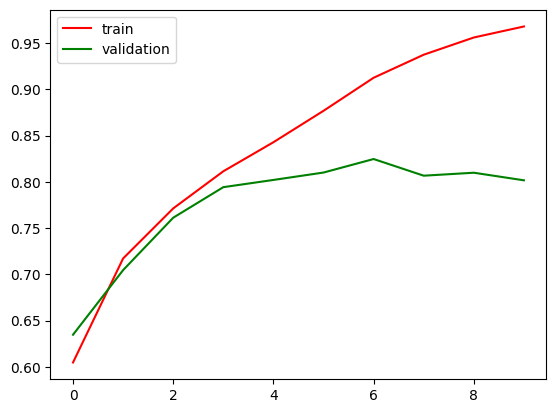

In [29]:
#Graph Plots
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='green',label='validation')
plt.legend()
plt.show()

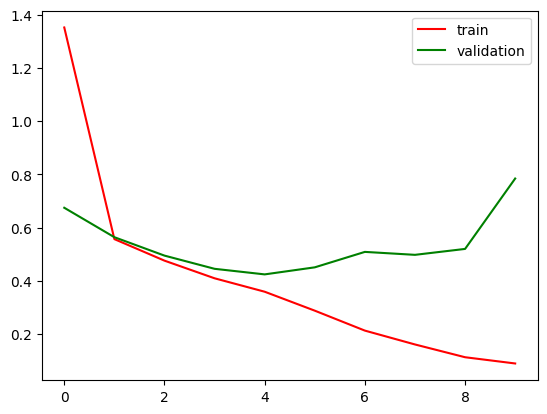

In [30]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='green',label='validation')
plt.legend()
plt.show()

In [31]:
import cv2

In [48]:
demo_image = cv2.imread('/content/dogimage.jpg')

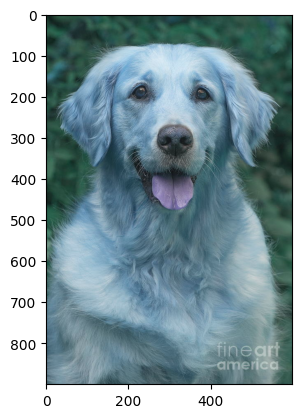

In [49]:
plt.imshow(demo_image)

In [50]:
demo_image.shape

(900, 600, 3)

In [51]:
demo_image=cv2.resize(demo_image,(256,256))

In [52]:
demo_input = demo_image.reshape((1,256,256,3))

In [53]:
model.predict(demo_input)

1/1 [==============================] - 0s 21ms/step


array([[0.]], dtype=float32)